**# 1) Import Statements**


In [80]:
import pandas as pd
import numpy as np
import os
import random
import shutil
from PIL import Image
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from IPython.display import Image
from matplotlib.image import imread
from IPython.display import display, Image as IPImage
import tensorflow as tf
import cv2
import matplotlib as plt

from matplotlib.pyplot import imread

import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

import matplotlib.pyplot as plt

from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.optimizers import Adam


In [21]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [22]:
current_directory = os.listdir('/gdrive/MyDrive/Colab Notebooks/')

In [30]:
os.listdir('/gdrive/MyDrive/Colab Notebooks/catchemall')

['raw_data']

In [ ]:
# os.listdir('/gdrive/MyDrive/Colab Notebooks/catchemall/raw_data/computer_vision/pokemon.csv')

In [31]:

path_images = '/gdrive/MyDrive/Colab Notebooks/catchemall/raw_data/computer_vision/types/'
path_csv = '/gdrive/MyDrive/Colab Notebooks/catchemall/raw_data/computer_vision/pokemon.csv'

df = pd.read_csv(path_csv)


In [26]:
df = df.fillna('')
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False, drop='first'), ['Type1', 'Type2'])
    ],
    remainder='passthrough'
)
pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

result = pipeline.fit_transform(df[['Type1', 'Type2']])
feature_names_out = pipeline.named_steps['preprocessor'].named_transformers_['onehot'].get_feature_names_out(['Type1', 'Type2'])
onehot_df = pd.DataFrame(result, columns=feature_names_out)
for col in onehot_df.columns:
    if col.startswith('Type1_'):
        onehot_df.rename(columns={col: col.replace('Type1_', '')}, inplace=True)
    elif col.startswith('Type2_'):
        onehot_df.rename(columns={col: col.replace('Type2_', '')}, inplace=True)
merged_df = onehot_df.groupby(level=0, axis=1).sum()
result = pd.concat([df, merged_df], axis=1)
result = result.drop(['Type1', 'Type2'], axis=1)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
result


,Name,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,bulbasaur,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,ivysaur,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,venusaur,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,charmander,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,charmeleon,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,stakataka,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
805,blacephalon,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
806,zeraora,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
807,meltan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [27]:
types_pokemon = result.columns
types_pokemon = types_pokemon.drop('Name')


In [ ]:
types_pokemon


Index(['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire',
       'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison',
       'Psychic', 'Rock', 'Steel', 'Water'],
      dtype='object')

In [ ]:
def cleaning_identifier(folder):
    for filename in os.listdir(folder):
        if filename.endswith('.Identifier'):
            target_to_remove = os.path.join(folder, filename)
            os.remove(target_to_remove)

# cleaning_identifier(mettre dossier à clean)


In [ ]:
def auto_cleaning_identifier(folder):
    for filename in os.listdir(folder):
        tiny_folder = os.path.join(folder, filename)
        print(tiny_folder)
        if os.path.isdir(tiny_folder):
            for tiny_filename in os.listdir(tiny_folder):
                if tiny_filename.endswith('.Identifier'):
                    target_to_remove = os.path.join(tiny_folder, tiny_filename)
                    os.remove(target_to_remove)
        print(os.path.isdir(tiny_folder))
        if filename.endswith('.Identifier'):
            target_to_remove = os.path.join(folder, filename)
            os.remove(target_to_remove)

# auto_cleaning_identifier(mettre dossier types à clean)


In [ ]:
def copy_matching_pokemon_images(source_folder, target_folder):
    # check every type of pokemon
    for type_folder in os.listdir(target_folder):
        type_folder_path = os.path.join(target_folder, type_folder)

        # check file type in lower
        for target_name in os.listdir(type_folder_path):
            target_name_brut = target_name.lower()
            target_parts = target_name_brut.split('.')
            target_name = target_parts[0]

            # look every image on the new data source
            for filename in os.listdir(source_folder):
                source_file_path = os.path.join(source_folder, filename)
                # check source in lower

                source_filename_lower = filename.lower()
                # if the file start with de correct name

                if source_filename_lower.startswith(target_name):

                    # create the target
                    target_file_path = os.path.join(type_folder_path, filename)
                    # copy the image
                    shutil.copy(source_file_path, target_file_path)

# source_folder = source_image
# target_folder = path_images

#  copy_matching_pokemon_images(source_folder, target_folder)


In [32]:
pokemon_dict = {}
for type_pokemon in types_pokemon:
    path_images_type = f"{path_images}{type_pokemon}"
    pokemon_dict[type_pokemon] = ""
    temp_list = []
    for fichier in os.listdir(path_images_type):
        if fichier.endswith(('.png', '.jpg', 'jpeg')):
            temp_list.append(fichier)
            pokemon_dict[type_pokemon]=temp_list

pokemon_dict


{'Bug': ['Cascoon_19078.png',
  'Spinarak_12643.png',
  'Heracross_15820.png',
  'Vespiquen_26415.png',
  'Karrablast_32209.png',
  'Illumise_21397.png',
  'Pineco_15161.png',
  'Paras_3441.png',
  'Paras_3461.png',
  'Burmy_26256.png',
  'Karrablast_32215.png',
  'Surskit_19859.png',
  'Pineco_15148.png',
  'Heracross_15795.png',
  'Pheromosa_35932.png',
  'Spinarak_12644.png',
  'Beedrill_1062.png',
  'Vespiquen_26426.png',
  'Spinarak_12637.png',
  'Silcoon_18992.png',
  'Parasect_3508.png',
  'Spinarak_12693.png',
  'Pineco_15152.png',
  'Cascoon_19080.png',
  'Paras_3487.png',
  'Larvesta_33458.png',
  'Spinarak_12684.png',
  'Spinarak_12690.png',
  'Pheromosa_35934.png',
  'Heracross_15776.png',
  'Cascoon_19075.png',
  'Silcoon_19008.png',
  'Karrablast_32224.png',
  'Larvesta_33456.png',
  'Illumise_21436.png',
  'Illumise_21405.png',
  'Kricketune_25836.png',
  'Cascoon_19073.png',
  'Kricketune_25842.png',
  'Cascoon_19079.png',
  'Butterfree_839.png',
  'Parasect_3549.png',


In [33]:
nbr_poke = []
for key, values in pokemon_dict.items():
    taille = len(pokemon_dict[key])
    nbr_poke.append(taille)
nbr_poke


[3318,
 1831,
 1544,
 2170,
 1561,
 2068,
 2726,
 4557,
 1376,
 3903,
 3245,
 1620,
 5018,
 3572,
 3556,
 2738,
 1809,
 6523]

In [34]:
nbr_poke = {}
for key, values in pokemon_dict.items():
    nbr_poke[key] = len(pokemon_dict[key])

nbr_poke


{'Bug': 3318,
 'Dark': 1831,
 'Dragon': 1544,
 'Electric': 2170,
 'Fairy': 1561,
 'Fighting': 2068,
 'Fire': 2726,
 'Flying': 4557,
 'Ghost': 1376,
 'Grass': 3903,
 'Ground': 3245,
 'Ice': 1620,
 'Normal': 5018,
 'Poison': 3572,
 'Psychic': 3556,
 'Rock': 2738,
 'Steel': 1809,
 'Water': 6523}

In [35]:
my_picture_path_list = []
count = 0
for key, values in pokemon_dict.items():

    for i in values:
        chemin_image = f"{path_images}{key}/{i}"
        my_picture_path_list.append(chemin_image)
        count += 1
my_picture_path_list

['/gdrive/MyDrive/Colab Notebooks/catchemall/raw_data/computer_vision/types/Bug/Cascoon_19078.png',
 '/gdrive/MyDrive/Colab Notebooks/catchemall/raw_data/computer_vision/types/Bug/Spinarak_12643.png',
 '/gdrive/MyDrive/Colab Notebooks/catchemall/raw_data/computer_vision/types/Bug/Heracross_15820.png',
 '/gdrive/MyDrive/Colab Notebooks/catchemall/raw_data/computer_vision/types/Bug/Vespiquen_26415.png',
 '/gdrive/MyDrive/Colab Notebooks/catchemall/raw_data/computer_vision/types/Bug/Karrablast_32209.png',
 '/gdrive/MyDrive/Colab Notebooks/catchemall/raw_data/computer_vision/types/Bug/Illumise_21397.png',
 '/gdrive/MyDrive/Colab Notebooks/catchemall/raw_data/computer_vision/types/Bug/Pineco_15161.png',
 '/gdrive/MyDrive/Colab Notebooks/catchemall/raw_data/computer_vision/types/Bug/Paras_3441.png',
 '/gdrive/MyDrive/Colab Notebooks/catchemall/raw_data/computer_vision/types/Bug/Paras_3461.png',
 '/gdrive/MyDrive/Colab Notebooks/catchemall/raw_data/computer_vision/types/Bug/Burmy_26256.png',


In [36]:
my_picture_path = {}
count = 0
for key, values in pokemon_dict.items():
    temp_list = []
    for i in values:
        chemin_image = f"{path_images}{key}/{i}"
        temp_list.append(chemin_image)
        my_picture_path[key] = temp_list
        count += 1

my_picture_path

{'Bug': ['/gdrive/MyDrive/Colab Notebooks/catchemall/raw_data/computer_vision/types/Bug/Cascoon_19078.png',
  '/gdrive/MyDrive/Colab Notebooks/catchemall/raw_data/computer_vision/types/Bug/Spinarak_12643.png',
  '/gdrive/MyDrive/Colab Notebooks/catchemall/raw_data/computer_vision/types/Bug/Heracross_15820.png',
  '/gdrive/MyDrive/Colab Notebooks/catchemall/raw_data/computer_vision/types/Bug/Vespiquen_26415.png',
  '/gdrive/MyDrive/Colab Notebooks/catchemall/raw_data/computer_vision/types/Bug/Karrablast_32209.png',
  '/gdrive/MyDrive/Colab Notebooks/catchemall/raw_data/computer_vision/types/Bug/Illumise_21397.png',
  '/gdrive/MyDrive/Colab Notebooks/catchemall/raw_data/computer_vision/types/Bug/Pineco_15161.png',
  '/gdrive/MyDrive/Colab Notebooks/catchemall/raw_data/computer_vision/types/Bug/Paras_3441.png',
  '/gdrive/MyDrive/Colab Notebooks/catchemall/raw_data/computer_vision/types/Bug/Paras_3461.png',
  '/gdrive/MyDrive/Colab Notebooks/catchemall/raw_data/computer_vision/types/Bug/B

In [ ]:
message = 'python.png'

# check if the message starts with Python
print(message.endswith('.png'))


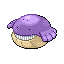

In [37]:
# Chemin vers l'image
image_path_test1 = '/gdrive/MyDrive/Colab Notebooks/catchemall/raw_data/computer_vision/types/Water/Wailmer_21707.png'

# Afficher l'image
Image(filename=image_path_test1)

In [ ]:
list_shape = []
for i in range(len(my_picture_path_list)):
    x = img_to_array(load_img(my_picture_path_list[i]))/255
    list_shape.append(x.shape)
set(list_shape)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


KeyboardInterrupt: ignored

In [ ]:
len(set(list_shape))


In [ ]:
# break

In [38]:
nbr_test = {}
for key, value in nbr_poke.items():
    pourcentage = int(value*0.2)
    nbr_test[key] = pourcentage
nbr_test


{'Bug': 663,
 'Dark': 366,
 'Dragon': 308,
 'Electric': 434,
 'Fairy': 312,
 'Fighting': 413,
 'Fire': 545,
 'Flying': 911,
 'Ghost': 275,
 'Grass': 780,
 'Ground': 649,
 'Ice': 324,
 'Normal': 1003,
 'Poison': 714,
 'Psychic': 711,
 'Rock': 547,
 'Steel': 361,
 'Water': 1304}

In [ ]:
path_images


'/gdrive/MyDrive/Colab Notebooks/catchemall/raw_data/computer_vision/types/'

In [39]:
pourcentage_train = 80

root_folder = '/gdrive/MyDrive/Colab Notebooks/catchemall/raw_data/computer_vision/'
destination_folder = os.path.join(root_folder, "train_test")
destination_train = os.path.join(destination_folder, "train")
destination_test = os.path.join(destination_folder, "test")

# clear the destination folder if exist
def clear_folder(folder):
    if os.path.exists(folder):
        shutil.rmtree(folder)
    os.makedirs(folder)

# apply the cleaning function

def data_train_test_split(destination_folder,destination_train,destination_test):
  for type_pokemon, fichiers in my_picture_path.items():
      # shuffle the path
      random.shuffle(fichiers)

      # take the pourcentage of train and round on integer
      split_index = int(len(fichiers) * pourcentage_train / 100)

      # manual slip for train/test
      train_set = fichiers[:split_index]
      test_set = fichiers[split_index:]

      # create train/test folder for every type
      train_folder = f"{type_pokemon}_train"
      test_folder = f"{type_pokemon}_test"
      os.makedirs(train_folder, exist_ok=True)
      os.makedirs(test_folder, exist_ok=True)

      # create a !!COPY!! for every pic on the right folder
      for fichier in train_set:
          shutil.copy(fichier, os.path.join(train_folder, os.path.basename(fichier)))

      for fichier in test_set:
          shutil.copy(fichier, os.path.join(test_folder, os.path.basename(fichier)))

      # move all folder on the right place
      shutil.move(train_folder, os.path.join(destination_train, train_folder))
      shutil.move(test_folder, os.path.join(destination_test, test_folder))


In [41]:
!cp -r "/gdrive/MyDrive/Colab Notebooks/catchemall/raw_data/computer_vision/train_test" raw_data/


In [ ]:
!du -h raw_data


/content
raw_data  sample_data


In [42]:
train_data_dir = "/content/raw_data/train_test/train"
test_data_dir = "/content/raw_data/train_test/train"
print(train_data_dir)
print(test_data_dir)


/content/raw_data/train_test/train
/content/raw_data/train_test/train


In [43]:
train_ds = image_dataset_from_directory(train_data_dir,
                                        labels="inferred",
                                        label_mode="categorical",
                                        image_size=(120,120),
                                        batch_size=32,
                                        seed=123)

train_ds


Found 42500 files belonging to 18 classes.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 120, 120, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 18), dtype=tf.float32, name=None))>

In [44]:

# Split dataset into Train, Validation & Test sets

size = 120   # Resize all images to (size,size)
bs = 64      # Batch size # 32 => 64 pour v3


# Data augmentation on train dataset only
train_data_gen = ImageDataGenerator(width_shift_range = 0.1,
                                    height_shift_range = 0.1,
                                    zoom_range=0.2,
                                    rotation_range=20,  # add roation v3
                                    shear_range=0.1,
                                    brightness_range=[0.8,1.2],
                                    horizontal_flip=True, # Last add for better accuracy for V2
                                    validation_split=0.15,
                                    preprocessing_function=preprocess_input)

train_data = train_data_gen.flow_from_directory(destination_train,
                                                class_mode='categorical',
                                                target_size=(size,size),
                                                color_mode='rgb',
                                                batch_size=bs,
                                                seed=42,
                                                subset='training')

validation_data_gen = ImageDataGenerator(validation_split=0.15,
                                         preprocessing_function=preprocess_input)

validation_data = validation_data_gen.flow_from_directory(destination_train,
                                                          class_mode='categorical',
                                                          target_size=(size,size),
                                                          color_mode='rgb',
                                                          batch_size=bs,
                                                          seed=42,
                                                          subset='validation')

test_data_gen = ImageDataGenerator(validation_split=0.10,
                                   preprocessing_function=preprocess_input)

test_data = test_data_gen.flow_from_directory(destination_train,
                                              class_mode='categorical',
                                              target_size=(size,size),
                                              color_mode='rgb',
                                              subset='validation',
                                              shuffle=False)


Found 36131 images belonging to 18 classes.
Found 6369 images belonging to 18 classes.
Found 4242 images belonging to 18 classes.


In [48]:
# Assign essential variables

shape = train_data.image_shape                 # Shape of train images (height,width,channels)
print(shape)
k = train_data.num_classes                     # Total number of labels or classes
train_samples = train_data.samples             # Total number of images in train set
validation_samples = validation_data.samples   # total number of images in validation set


(120, 120, 3)


In [ ]:
## Premier Model inceptionV3 : resultat MERDIQUE

In [ ]:

# Build the model

def initialize_model_v1():
  input = Input(shape=shape)

  basemodel = InceptionV3(include_top=False,
                          weights='imagenet',
                          input_shape=shape,
                          pooling='avg')
  basemodel.trainable = False
  x = basemodel(input)

  x = Dense(64, activation='relu')(x)
  x = BatchNormalization()(x)
  x = Dropout(0.2)(x)
  x = Dense(512, activation='relu')(x)
  x = Dropout(0.2)(x)
  x = Dense(1024, activation='relu')(x)
  x = Dropout(0.2)(x)
  output = Dense(k, activation='softmax')(x)

  model = Model(input,output)

  # Compile the model

  model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


  # Model Summary
  return model


In [ ]:
model = initialize_model_v1()
model.summary()
# Initialize callbacks
stop = EarlyStopping(monitor='val_loss',
                      patience=4,
                      mode='min',
                      restore_best_weights=True)

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 120, 120, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 dense_16 (Dense)            (None, 64)                131136    
                                                                 
 batch_normalization_482 (B  (None, 64)                256       
 atchNormalization)                                              
                                                                 
 dropout_12 (Dropout)        (None, 64)                0         
                                                                 
 dense_17 (Dense)            (None, 512)               33280     
                                                           

KeyboardInterrupt: ignored

In [ ]:
def initialize_model_v2():

    input_layer = Input(shape=shape)


    basemodel = InceptionV3(weights='imagenet',
                            include_top=False,
                            input_tensor=input_layer,
                            pooling='avg')
    basemodel.trainable = False

    # remove 1 layer and add 3 BatchNormalize
    x = Dense(256, activation='relu')(basemodel.output)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    x = Dense(128, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    x = Dense(64, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    output_layer = Dense(k, activation='softmax')(x)

    # create the final model
    model2 = Model(inputs=input_layer, outputs=output_layer)

    # model compilation
    optimizer = Adam(learning_rate=0.001)
    model2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model2

In [ ]:
model_3 = initialize_model_v2()
model_3.summary()
# Initialize callbacks
stop = EarlyStopping(monitor='val_loss',
                      patience=4,
                      mode='min',
                      restore_best_weights=True)

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, 120, 120, 3)]        0         []                            
                                                                                                  
 conv2d_658 (Conv2D)         (None, 59, 59, 32)           864       ['input_9[0][0]']             
                                                                                                  
 batch_normalization_677 (B  (None, 59, 59, 32)           96        ['conv2d_658[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_658 (Activation  (None, 59, 59, 32)           0         ['batch_normalization_67

In [ ]:
ep = 50                      # Number of epochs
spe = train_samples/bs       # Steps per epoch
vs = validation_samples/bs   # Validation steps

r = model_3.fit(train_data,
              validation_data=validation_data,
              steps_per_epoch=spe,
              validation_steps=vs,
              epochs=ep,
              callbacks=[stop])

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 15/564 [..............................] - ETA: 2:41:06 - loss: 4.0849 - accuracy: 0.0521

In [ ]:
# Plot training history

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [49]:
def initialize_model_v2_01():

    input_layer = Input(shape=shape)


    basemodel = InceptionV3(weights='imagenet',
                            include_top=False,
                            input_tensor=input_layer,
                            pooling='avg')
    basemodel.trainable = False

    # remove 1 layer and add 3 BatchNormalize
    x = Dense(256, activation='relu')(basemodel.output)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    x = Dense(128, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    x = Dense(64, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    output_layer = Dense(k, activation='softmax')(x)

    # create the final model
    model = Model(inputs=input_layer, outputs=output_layer)

    # model compilation
    optimizer = Adam(learning_rate=0.01)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [50]:
model_4 = initialize_model_v2_01()
model_4.summary()

87910968/87910968 [==============================] - 3s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 120, 120, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 59, 59, 32)           864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 59, 59, 32)           96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     

In [51]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [53]:


MODEL = "model_8"

es = EarlyStopping(monitor='val_loss',
                   mode='auto',
                   patience=10,
                   verbose=1,
                   restore_best_weights=True)

lr = ReduceLROnPlateau(monitor="val_loss",
                       factor=0.1,
                       patience=2,
                       verbose=1,
                       min_lr=0)

mcp = ModelCheckpoint("{}.h5".format(MODEL),
                      save_weights_only=True,
                      monitor='val_accuracy',
                      mode='max',
                      verbose=0,
                      save_best_only=True)

history = model_4.fit(train_data,
                        validation_data=validation_data,
                        epochs=20,
                        callbacks=[es, lr, mcp],
                        batch_size=32,
                        verbose=1)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


565/565 [==============================] - 237s 394ms/step - loss: 2.8169 - accuracy: 0.1243 - val_loss: 2.7181 - val_accuracy: 0.1380 - lr: 0.0100
Epoch 2/20
565/565 [==============================] - 221s 391ms/step - loss: 2.6754 - accuracy: 0.1564 - val_loss: 2.6919 - val_accuracy: 0.1531 - lr: 0.0100
Epoch 3/20
565/565 [==============================] - 218s 386ms/step - loss: 2.6428 - accuracy: 0.1656 - val_loss: 2.6909 - val_accuracy: 0.1523 - lr: 0.0100
Epoch 4/20
565/565 [==============================] - 218s 386ms/step - loss: 2.6189 - accuracy: 0.1751 - val_loss: 2.6663 - val_accuracy: 0.1721 - lr: 0.0100
Epoch 5/20
565/565 [==============================] - 217s 384ms/step - loss: 2.6029 - accuracy: 0.1816 - val_loss: 2.6530 - val_accuracy: 0.1694 - lr: 0.0100
Epoch 6/20
565/565 [==============================] - 218s 385ms/step - loss: 2.5907 - accuracy: 0.1854 - val_loss: 2.6766 - val_accuracy: 0.1732 - lr: 0.0100
Epoch 7/20
565/565 [==============================] - ETA

In [ ]:
model_4 = initialize_model_v2_01()
model_4.summary()
# Initialize callbacks
stop = EarlyStopping(monitor='val_loss',
                      patience=10,
                      mode='min',
                      restore_best_weights=True)

In [94]:
MODEL = "model_8"

es = EarlyStopping(monitor='val_loss',
                   mode='auto',
                   patience=10,
                   verbose=1,
                   restore_best_weights=True)


mcp = ModelCheckpoint("{}.h5".format(MODEL),
                      save_weights_only=True,
                      monitor='val_accuracy',
                      mode='max',
                      verbose=0,
                      save_best_only=True)

history = model_4.fit(train_data,
                        validation_data=validation_data,
                        epochs=30,
                        callbacks=[es, lr, mcp],
                        batch_size=32,
                        verbose=1)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/30
565/565 [==============================] - 222s 393ms/step - loss: 2.4719 - accuracy: 0.2179 - val_loss: 2.6242 - val_accuracy: 0.1842 - lr: 1.0000e-06
Epoch 2/30
565/565 [==============================] - 222s 393ms/step - loss: 2.4776 - accuracy: 0.2158 - val_loss: 2.6251 - val_accuracy: 0.1839 - lr: 1.0000e-06
Epoch 3/30
565/565 [==============================] - ETA: 0s - loss: 2.4734 - accuracy: 0.2181
Epoch 3: ReduceLROnPlateau reducing learning rate to 9.99999883788405e-08.
565/565 [==============================] - 220s 389ms/step - loss: 2.4734 - accuracy: 0.2181 - val_loss: 2.6245 - val_accuracy: 0.1823 - lr: 1.0000e-06
Epoch 4/30
565/565 [==============================] - 218s 386ms/step - loss: 2.4743 - accuracy: 0.2192 - val_loss: 2.6246 - val_accuracy: 0.1840 - lr: 1.0000e-07
Epoch 5/30
565/565 [==============================] - ETA: 0s - loss: 2.4795 - accuracy: 0.2183
Epoch 5: ReduceLROnPlateau reducing learning rate to 9.999998695775504e-09.
565/565 [=======

Epoch 1/50


InvalidArgumentError: ignored

In [54]:
model_4.evaluate(validation_data)


100/100 [==============================] - 11s 114ms/step - loss: 2.6254 - accuracy: 0.1834


[2.625375747680664, 0.18338829278945923]

In [55]:
pred = model_4.predict(test_data)

133/133 [==============================] - 10s 63ms/step


In [66]:
save_path = '/gdrive/MyDrive/Colab Notebooks/catchemall/inceptionv3_model.h5'
model_4.save(save_path)

In [56]:
labels = list(train_data.class_indices.keys())

In [57]:
top3_probs = np.partition(pred, -3, axis=1)[:, -3:]
top3_classes = np.argsort(pred, axis=1)[:, -3:]

In [58]:
top3_classes[0]

array([14, 17, 12])

In [59]:
top3_probs

array([[0.0997436 , 0.1039331 , 0.19420242],
       [0.0982176 , 0.16745365, 0.14701813],
       [0.10378409, 0.20071802, 0.20833823],
       ...,
       [0.09005552, 0.22619602, 0.20702307],
       [0.07709163, 0.10033165, 0.22669838],
       [0.14423601, 0.16176184, 0.21739633]], dtype=float32)

In [71]:
import requests
from PIL import Image


In [67]:
image_urls = {
    "grass": "https://archives.bulbagarden.net/media/upload/0/0c/0810Grookey.png",
    "firebug": "https://archives.bulbagarden.net/media/upload/8/83/0851Centiskorch.png",
    "grasspsychic": "https://archives.bulbagarden.net/media/upload/8/80/1010Iron_Leaves.png",
    "normalflying": "https://archives.bulbagarden.net/media/upload/b/b3/HOME0931W.png"
}

In [72]:
images = {name: Image.open(requests.get(url, stream=True).raw).convert("RGB") for name, url in image_urls.items()}


In [74]:
target_size = (120, 120)
images_resized = {name: img.resize(target_size) for name, img in images.items()}

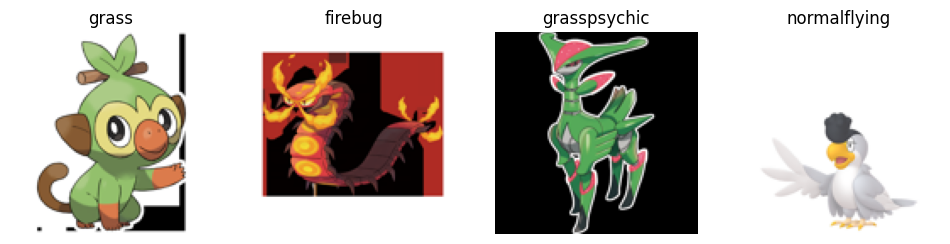

In [75]:
fig, axs = plt.subplots(1, len(images_resized), figsize=(12, 4))
for i, (name, img) in enumerate(images_resized.items()):
    axs[i].imshow(img)
    axs[i].axis("off")
    axs[i].set_title(name)
plt.show()

In [79]:
images_preprocessed = {name: img_to_array(img) for name, img in images_resized.items()}
images_preprocessed = {name: preprocess_input(img) for name, img in images_preprocessed.items()}
images_preprocessed = {name: np.expand_dims(img, axis=0) for name, img in images_preprocessed.items()}


In [82]:
predictions = {name: model_4.predict(img) for name, img in images_preprocessed.items()}


1/1 [==============================] - 0s 33ms/step


In [87]:
def custom_decode_predictions(preds, top=3, class_labels=None):
    decoded_predictions = []

    for pred in preds:
        # Obtenez les indices des classes prédites avec les meilleures probabilités
        top_indices = np.argsort(pred)[::-1][:top]

        # Obtenez les noms de classe correspondants
        top_labels = [class_labels[i] for i in top_indices]

        # Obtenez les probabilités correspondantes
        top_probs = [pred[i] for i in top_indices]

        decoded_predictions.append(list(zip(top_labels, top_probs)))

    return decoded_predictions

In [88]:
decoded_predictions = {name: custom_decode_predictions(preds, class_labels=labels) for name, preds in predictions.items()}


In [93]:
for name, decoded_preds in decoded_predictions.items():
    print(f"\n{name.capitalize()}:")
    for i, (label, score) in enumerate(decoded_preds[0]):
        print(f"{i + 1}: {label} ({score:.2f})")


Grass:
1: Water_train (0.19)
2: Normal_train (0.14)
3: Psychic_train (0.11)

Firebug:
1: Normal_train (0.14)
2: Water_train (0.10)
3: Fire_train (0.10)

Grasspsychic:
1: Water_train (0.17)
2: Dragon_train (0.15)
3: Flying_train (0.13)

Normalflying:
1: Dark_train (0.13)
2: Ghost_train (0.11)
3: Normal_train (0.11)


In [ ]:
rand = np.random.randint(low=0, high=test_data.samples, size=5)

for n in rand:
  true_index = test_data.classes[n]
  predicted_index_1 = top3_classes[n][-1]
  predicted_proba_1 = round(top3_probs[n][-1]*100,2)
  predicted_index_2 = top3_classes[n][1]
  predicted_proba_2 = round(top3_probs[n][1]*100,2)
  img = cv2.imread(test_data.filepaths[n])
  plt.imshow(img)
  plt.title(f'True label={labels[true_index]} Predicted label={labels[predicted_index_1]}={predicted_proba_1}% {labels[predicted_index_2]}- {predicted_proba_2}%')
  plt.show()